In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pyvinecopulib as pv
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = yf.download(["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2018-12-31") #"GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"

[*********************100%***********************]  6 of 6 completed


In [3]:
data.head()

Adj Close                                                         \
                AAPL     BAS.DE     BMW.DE     DBK.DE       GOOG     RWE.DE   
Date                                                                          
2010-01-04  6.526021  24.106216  19.280523  32.229897  15.610239  39.131069   
2010-01-05  6.537303  23.740726  19.436930  32.749943  15.541497  38.881390   
2010-01-06  6.433320  23.891222  19.737720  32.407475  15.149715  38.807621   
2010-01-07  6.421426  23.732666  19.912174  32.553341  14.797037  38.643059   
2010-01-08  6.464118  23.660099  19.644472  33.739288  14.994298  38.586319   

               Close                                   ...       Open  \
                AAPL     BAS.DE     BMW.DE     DBK.DE  ...     BMW.DE   
Date                                                   ...              
2010-01-04  7.643214  44.849998  32.049999  39.474529  ...  31.820000   
2010-01-05  7.656429  44.169998  32.310001  40.111465  ...  31.959999   
2010-01-06  7.534643  44.450001  32.810001  39.692020  ...  32.450001   
2010-01-07  7.520714  44.154999  33.099998  39.870674  ...  32.650002   
2010-01-08  7.570714  44.020000  32.654999  41.323200  ...  33.334999   

                                                  Volume             \
               DBK.DE       GOOG     RWE.DE         AAPL     BAS.DE   
Date                                                                  
2010-01-04  38.837593  15.615220  68.222816  493729600.0  3245626.0   
2010-01-05  39.381317  15.620949  68.770988  601904800.0  3292371.0   
2010-01-06  39.909512  15.588072  68.202881  552160000.0  2345128.0   
2010-01-07  39.381317  15.178109  67.923813  477131200.0  2505352.0   
2010-01-08  40.740635  14.744733  68.133118  447610800.0  3307737.0   

                                                           
               BMW.DE      DBK.DE         GOOG     RWE.DE  
Date                                                       
2010-01-04  1808170.0   4425924.0   78541293.0  2022078.0  
2010-01-05  1564182.0   5950810.0  120638494.0  2040667.0  
2010-01-06  2218604.0   5818935.0  159744526.0  1535087.0  
2010-01-07  2026145.0   4506202.0  257533695.0  1765257.0  
2010-01-08  1925894.0  10753806.0  189680313.0  1665122.0  

[5 rows x 36 columns]

In [4]:
data = data["Adj Close"]

In [5]:
data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0), columns=data.columns)

In [6]:
data = data.dropna(axis=0)

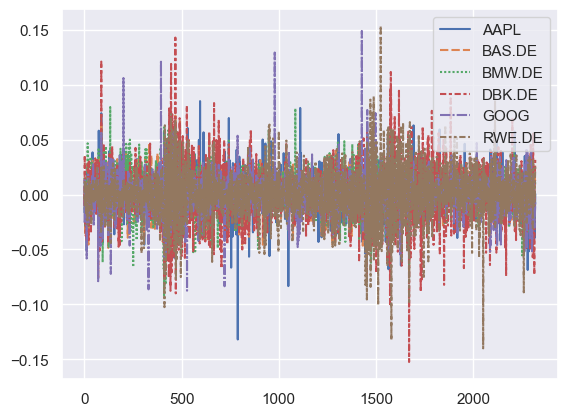

In [7]:
sns.lineplot(data = data);

In [8]:
np.mean(data.iloc[0])

-0.005383556269249097

In [9]:
data.iloc[0]

AAPL     -0.016034
BAS.DE    0.006319
BMW.DE    0.015357
DBK.DE   -0.010512
GOOG     -0.025532
RWE.DE   -0.001899
Name: 0, dtype: float64

In [10]:
PF = data.mean(axis=1)

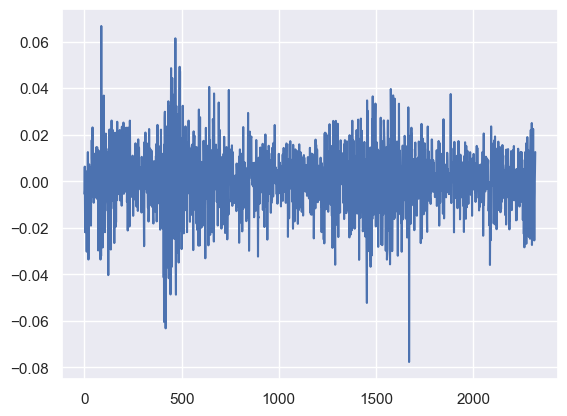

In [11]:
sns.lineplot(x = PF.index, y = PF);

# ARMA-GARCH

In [33]:
from arch import arch_model

In [23]:
am = arch_model(data.AAPL*100)

In [24]:
am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12488.679720574102
Iteration:      2,   Func. Count:     14,   Neg. LLF: 318742.81432050583
Iteration:      3,   Func. Count:     21,   Neg. LLF: 4100.587025459416
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4010.1989074269345
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4566.743881727243
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3974.2340331453124
Iteration:      7,   Func. Count:     49,   Neg. LLF: 3973.9319942924712
Iteration:      8,   Func. Count:     54,   Neg. LLF: 3973.9319854446267
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3973.9319854440178
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3973.9319854446267
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3973.93
Distribution:                  Normal   AIC:                           7955.86
Method:            Maximum Likelihood   BIC:                           7978.53
                                        No. Observations:                 2134
Date:                Fri, Oct 21 2022   Df Residuals:                     2133
Time:                        14:00:10   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1342  3.478e-02      3.859  1.138e-04 [6.606e-0

In [30]:
am.resids

<bound method ConstantMean.resids of Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x19b1b7ebf70>

In [34]:
import arch

In [ ]:
am2 = arch.univariate.GARCH.

# Copula VaR

In [12]:
u = pv.to_pseudo_obs(data)

In [13]:
cop = pv.Vinecop(u)

In [14]:
cop.aic()

-4674.849171838875

In [15]:
cop.families

[[<BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>,
  <BicopFamily.student: 2>,
  <BicopFamily.student: 2>,
  <BicopFamily.tll: 11>],
 [<BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>],
 [<BicopFamily.tll: 11>, <BicopFamily.bb8: 10>, <BicopFamily.frank: 5>],
 [<BicopFamily.tll: 11>, <BicopFamily.tll: 11>],
 [<BicopFamily.joe: 6>]]

In [16]:
cop.structure

<pyvinecopulib.RVineStructure>
5 2 2 2 6 6 
2 4 4 6 2 
4 3 6 4 
3 6 3 
6 5 
1 

In [17]:
cop.simulate(100)

array([[0.38785572, 0.29063626, 0.34190539, 0.55358346, 0.84125793,
        0.93660466],
       [0.86702989, 0.52274686, 0.5667038 , 0.39533474, 0.70143041,
        0.18341003],
       [0.72221763, 0.42456683, 0.30146146, 0.72156733, 0.67703225,
        0.27312453],
       [0.38674474, 0.6758432 , 0.61418067, 0.39675594, 0.34673389,
        0.16460542],
       [0.26386292, 0.07384721, 0.3284756 , 0.30696183, 0.29005221,
        0.48414076],
       [0.13042624, 0.61236624, 0.54323299, 0.5664111 , 0.12190078,
        0.17355064],
       [0.82853442, 0.77711855, 0.83903067, 0.8512571 , 0.76789917,
        0.43835655],
       [0.45244725, 0.01835523, 0.03548664, 0.03996602, 0.6667652 ,
        0.11040846],
       [0.8705018 , 0.70612066, 0.91654719, 0.33101679, 0.95929517,
        0.49078703],
       [0.4729793 , 0.97838003, 0.94549633, 0.48762858, 0.96375944,
        0.993197  ],
       [0.3185817 , 0.73873145, 0.88572408, 0.97474205, 0.46304119,
        0.88476632],
       [0.85033326, 0